# Energy data analysis

### This projects takes the energy information from BP statistical review

### The source link for the excel file is https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx

#### The file has sort of energy information: the ones used for this project is:

##### Oil Production - Tonnes
##### Gas Production - Mtoe
##### Coal Production - Mtoe
##### Nuclear Generation - TWh
##### Hydro Generation - TWh
##### Solar Generation - TWh displays the solar generation in TWh from 1965 til 2018
##### Wind Generation - TWh displays the wind generation in TWh from 1965 til 2018
##### Geo Biomass Other - TWh displays the geo+biomass+other generation in TWh from 1965 til 2018
##### Biofuels Production - Ktoe***
##### Carbon Dioxide Emissions displays the carbon emission in Million tonnes from 1965 til 2018

### 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('libraries imported')

libraries imported


### 2. Take all places, countries and regions

In [2]:
#Take the Places
Places = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Primary Energy Consumption', skiprows = 2)
Places.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Places.set_index('Countries', inplace=True)
Places = Places.iloc[:Places.index.get_loc('Total World')]
Places.dropna(how='all', axis=0, inplace=True)
Places = Places.index
Places

Index(['Canada', 'Mexico', 'US', 'Total North America', 'Argentina', 'Brazil',
       'Chile', 'Colombia', 'Ecuador', 'Peru', 'Trinidad & Tobago',
       'Venezuela', 'Central America', 'Other Caribbean',
       'Other South America', 'Total S. & Cent. America', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Other Europe', 'Total Europe',
       'Azerbaijan', 'Belarus', 'Kazakhstan', 'Russian Federation',
       'Turkmenistan', 'USSR', 'Uzbekistan', 'Other CIS', 'Total CIS', 'Iran',
       'Iraq', 'Israel', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates', 'Other Middle East', 'Total

In [3]:
#Take the countries
Countries = Places[~Places.str.startswith('Total')]#.sort_values()
Countries

Index(['Canada', 'Mexico', 'US', 'Argentina', 'Brazil', 'Chile', 'Colombia',
       'Ecuador', 'Peru', 'Trinidad & Tobago', 'Venezuela', 'Central America',
       'Other Caribbean', 'Other South America', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Other Europe', 'Azerbaijan', 'Belarus',
       'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR',
       'Uzbekistan', 'Other CIS', 'Iran', 'Iraq', 'Israel', 'Kuwait', 'Oman',
       'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Other Middle East',
       'Algeria', 'Egypt', 'Morocco', 'South Africa', 'Eastern Africa',
       'Middle Africa', 'Wes

In [4]:
#Take the regions
Regions = Places[Places.str.startswith('Total')]
Regions

Index(['Total North America', 'Total S. & Cent. America', 'Total Europe',
       'Total CIS', 'Total Middle East', 'Total Africa', 'Total Asia Pacific'],
      dtype='object', name='Countries')

### 2. Import energy data

In [5]:
#Import the Oil production data
Oil = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Oil Production - Tonnes', skiprows = 2)
Oil.rename(columns={'Million tonnes':'Countries'}, inplace =True)
Oil.set_index('Countries', inplace=True)
Oil.dropna(how='all', axis=0, inplace=True)
Oil.dropna(how='all', axis=1, inplace=True)
Oil.fillna(0, inplace=True)
Oil = Oil.iloc[:Oil.index.get_loc('Total World'),:Oil.columns.get_loc(2018)+1]
#display(Oil)

In [6]:
#Import the Gas production data
Gas = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Gas Production - Mtoe', skiprows = 2)
Gas.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Gas.set_index('Countries', inplace=True)
Gas.dropna(how='all', axis=0, inplace=True)
Gas.dropna(how='all', axis=1, inplace=True)
Gas.fillna(0, inplace=True)
Gas = Gas.iloc[:Gas.index.get_loc('Total World'),:Gas.columns.get_loc(2018)+1]
#display(Gas)

In [7]:
#Import Coal Production data 
Coal = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Coal Production - Mtoe', skiprows = 2)
Coal.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Coal.set_index('Countries', inplace=True)
Coal.dropna(how='all', axis=0, inplace=True)
Coal.dropna(how='all', axis=1, inplace=True)
Coal.fillna(0, inplace=True)
Coal = Coal.iloc[:Coal.index.get_loc('Total World'),:Coal.columns.get_loc(2018)+1]
#display(Coal)

In [8]:
#Import the nuclear generation
Nuclear = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Nuclear Generation - TWh', skiprows = 2)
Nuclear.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Nuclear.set_index('Countries', inplace=True)
Nuclear.dropna(how='all', axis=0, inplace=True)
Nuclear.dropna(how='all', axis=1, inplace=True)
Nuclear.fillna(0, inplace=True)
Nuclear = Nuclear.iloc[:Nuclear.index.get_loc('Total World'),:Nuclear.columns.get_loc(2018)+1]
#display(Nuclear)

In [9]:
#Import the hydro generation data
Hydro = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Hydro Generation - TWh', skiprows = 2)
Hydro.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Hydro.set_index('Countries', inplace=True)
Hydro.dropna(how='all', axis=0, inplace=True)
Hydro.dropna(how='all', axis=1, inplace=True)
Hydro.fillna(0, inplace=True)
Hydro = Hydro.iloc[:Hydro.index.get_loc('Total World'),:Hydro.columns.get_loc(2018)+1]
#display(Solar)

In [10]:
#Import the solar generation data
Solar = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Solar Generation - TWh', skiprows = 2)
Solar.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Solar.set_index('Countries', inplace=True)
Solar.dropna(how='all', axis=0, inplace=True)
Solar.dropna(how='all', axis=1, inplace=True)
Solar.fillna(0, inplace=True)
Solar = Solar.iloc[:Solar.index.get_loc('Total World'),:Solar.columns.get_loc(2018)+1]
#display(Solar)

In [11]:
#Import the Wind energy generation data
Wind = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Wind Generation - TWh ', skiprows=2)
Wind.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Wind.set_index('Countries', inplace=True)
Wind.dropna(how='all', axis=0, inplace=True)
Wind.dropna(how='all', axis=1, inplace=True)
Wind.fillna(0,inplace=True)
Wind = Wind.iloc[:Wind.index.get_loc('Total World'),:Wind.columns.get_loc(2018)+1]
#display(Wind)

In [12]:
#Import the Other energy generation data
Other = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Geo Biomass Other - TWh', skiprows = 2)
Other.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Other.set_index('Countries', inplace=True)
Other.dropna(how='all', axis=0, inplace=True)
Other.dropna(how='all', axis=1, inplace=True)
Other.fillna(0, inplace=True)
Other = Other.iloc[:Other.index.get_loc('Total World'),:Other.columns.get_loc(2018)+1]
#display(Other)

In [13]:
#Import the Carbon Dioxe data
Carbon = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Carbon Dioxide Emissions', skiprows = 2)
Carbon.rename(columns={'Million tonnes of carbon dioxide':'Countries'}, inplace =True)
Carbon.set_index('Countries', inplace=True)
Carbon.dropna(how='all', axis=0, inplace=True)
Carbon.dropna(how='all', axis=1, inplace=True)
Carbon.fillna(0, inplace=True)
Carbon = Carbon.iloc[:Carbon.index.get_loc('Total World'),:Carbon.columns.get_loc(2018)+1]
#display(Carbon)

### 3. Create energy data variables

In [14]:
Energy_type = [Oil, Gas, Coal, Nuclear, Hydro, Solar, Wind, Other, Carbon]
energy = ["Oil","Gas","Coal","Nuclear","Hydro","Solar", "Wind", "Other", "Carbon"]

# Create a dict to correlate the Energy with specific color
color = ['blue', 'orange', 'green', 'red','purple', 'brown', 'cyan', 'gray', 'olive']
dicts = {}
for i in range(0,len(energy)):
    dicts[energy[i]] = color[i]

### 4. Take the countries by region

In [15]:
# Countries in Total North America
North_America = Places[:Places.get_loc('Total North America')]
North_America

Index(['Canada', 'Mexico', 'US'], dtype='object', name='Countries')

In [16]:
# Countries in Total S. & Cent. America
Cent_America = Places[Places.get_loc('Total North America')+1:Places.get_loc('Total S. & Cent. America')]
Cent_America

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru',
       'Trinidad & Tobago', 'Venezuela', 'Central America', 'Other Caribbean',
       'Other South America'],
      dtype='object', name='Countries')

In [17]:
# Countries in Total Europe
Europe = Places[Places.get_loc('Total S. & Cent. America')+1:Places.get_loc('Total Europe')]
Europe

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Other Europe'],
      dtype='object', name='Countries')

In [18]:
# Countries in Total CIS
CIS = Places[Places.get_loc('Total Europe')+1:Places.get_loc('Total CIS')]
CIS

Index(['Azerbaijan', 'Belarus', 'Kazakhstan', 'Russian Federation',
       'Turkmenistan', 'USSR', 'Uzbekistan', 'Other CIS'],
      dtype='object', name='Countries')

In [19]:
# Countries in Total Middle East
Middle_East = Places[Places.get_loc('Total CIS')+1:Places.get_loc('Total Middle East')]
Middle_East

Index(['Iran', 'Iraq', 'Israel', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates', 'Other Middle East'],
      dtype='object', name='Countries')

In [20]:
# Countries in Total Africa
Africa = Places[Places.get_loc('Total Middle East')+1:Places.get_loc('Total Africa')]
Africa

Index(['Algeria', 'Egypt', 'Morocco', 'South Africa', 'Eastern Africa',
       'Middle Africa', 'Western Africa', 'Other Northern Africa',
       'Other Southern Africa'],
      dtype='object', name='Countries')

In [21]:
# Countries in Total Asia Pacific
Asia_Pacific = Places[Places.get_loc('Total Africa')+1:Places.get_loc('Total Asia Pacific')]
Asia_Pacific

Index(['Australia', 'Bangladesh', 'China', 'China Hong Kong SAR', 'India',
       'Indonesia', 'Japan', 'Malaysia', 'New Zealand', 'Pakistan',
       'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan',
       'Thailand', 'Vietnam', 'Other Asia Pacific'],
      dtype='object', name='Countries')

In [22]:
Countries_Region = [North_America,Cent_America,Europe,CIS,Middle_East,Africa,Asia_Pacific]

### 5. Correlation table

In [23]:
# Create the correlation table for all the countries
a = pd.DataFrame([])
m=0
for j in Countries:
    type_energy = []
    n=0
    Table = []
    for i in Energy_type:
        try:
            Table.append(i.loc[j])
            type_energy.append(energy[n])
        except KeyError:
            print(f"{j} don't have information of {energy[n]}")

        n+=1

    Table=pd.DataFrame(Table)
    Table.index=type_energy
    Table = Table[(Table.T != 0).any()]
    Table=Table.transpose()
    x = Table.corr()
    x = x.tail(1)
    x.replace({1.0:j}, inplace=True)
    a = a.append(x)
    m+=1


Argentina don't have information of Coal
Chile don't have information of Oil
Chile don't have information of Gas
Chile don't have information of Coal
Ecuador don't have information of Gas
Ecuador don't have information of Coal
Peru don't have information of Coal
Trinidad & Tobago don't have information of Coal
Central America don't have information of Oil
Central America don't have information of Gas
Central America don't have information of Coal
Other Caribbean don't have information of Oil
Other Caribbean don't have information of Gas
Other Caribbean don't have information of Coal
Other South America don't have information of Oil
Other South America don't have information of Gas
Other South America don't have information of Coal
Austria don't have information of Oil
Austria don't have information of Gas
Austria don't have information of Coal
Belgium don't have information of Oil
Belgium don't have information of Gas
Belgium don't have information of Coal
Bulgaria don't have informati

C:\Users\tayze\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Czech Republic don't have information of Oil
Czech Republic don't have information of Gas
Denmark don't have information of Coal
Estonia don't have information of Oil
Estonia don't have information of Gas
Estonia don't have information of Coal
Finland don't have information of Oil
Finland don't have information of Gas
Finland don't have information of Coal
France don't have information of Oil
France don't have information of Gas
France don't have information of Coal
Germany don't have information of Oil
Greece don't have information of Oil
Greece don't have information of Gas
Hungary don't have information of Oil
Hungary don't have information of Gas
Iceland don't have information of Oil
Iceland don't have information of Gas
Iceland don't have information of Coal
Ireland don't have information of Oil
Ireland don't have information of Gas
Ireland don't have information of Coal
Italy don't have information of Coal
Latvia don't have information of Oil
Latvia don't have information of Gas


In [24]:
# Set the correlation with Carbon for each countrie
a.rename(columns={'Carbon':'Countries'}, inplace =True)
display(a)

,Countries,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Carbon,Canada,0.076312,0.937727,0.912657,0.854412,0.852756,0.916753,0.448614,0.519656
Carbon,Mexico,0.93808,0.953441,0.886887,0.899477,0.769522,0.937109,0.343604,0.538245
Carbon,US,0.640129,0.0882985,0.220581,0.874649,-0.621165,0.824446,0.103877,0.237046
Carbon,Argentina,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Carbon,Brazil,-0.28791,0.964477,0.958136,0.906172,0.959684,0.892131,0.281267,0.555754
...,...,...,...,...,...,...,...,...,...
Carbon,Sri Lanka,NaN,NaN,0.802698,NaN,NaN,0.774,0.653505,0.75897
Carbon,Taiwan,NaN,NaN,0.0889466,0.859332,NaN,0.911818,0.40668,0.646956
Carbon,Thailand,0.66493,0.976489,0.759222,NaN,0.960473,0.77351,0.564777,0.55368
Carbon,Vietnam,0.880569,0.955017,0.978323,NaN,0.734908,0.863412,0.509448,0.834941


In [36]:
ahhh=a.set_index('Countries')
ahhh

,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,
Canada,0.076312,0.937727,0.912657,0.854412,0.852756,0.916753,0.448614,0.519656
Mexico,0.93808,0.953441,0.886887,0.899477,0.769522,0.937109,0.343604,0.538245
US,0.640129,0.0882985,0.220581,0.874649,-0.621165,0.824446,0.103877,0.237046
Argentina,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Brazil,-0.28791,0.964477,0.958136,0.906172,0.959684,0.892131,0.281267,0.555754
...,...,...,...,...,...,...,...,...
Sri Lanka,NaN,NaN,0.802698,NaN,NaN,0.774,0.653505,0.75897
Taiwan,NaN,NaN,0.0889466,0.859332,NaN,0.911818,0.40668,0.646956
Thailand,0.66493,0.976489,0.759222,NaN,0.960473,0.77351,0.564777,0.55368


In [26]:
y = []

for i in range(0,len(Countries)):
    if a.iloc[i,0] in Countries_Region[0]:
        y.append(Regions[0])
    elif a.iloc[i,0] in Countries_Region[1]:
        y.append(Regions[1])
    elif a.iloc[i,0] in Countries_Region[2]:
        y.append(Regions[2])
    elif a.iloc[i,0] in Countries_Region[3]:
        y.append(Regions[3])
    elif a.iloc[i,0] in Countries_Region[4]:
        y.append(Regions[4])
    elif a.iloc[i,0] in Countries_Region[5]:
        y.append(Regions[5])
    elif a.iloc[i,0] in Countries_Region[6]:
        y.append(Regions[6])

a['Regions'] = y

a.set_index('Regions',inplace=True)
display(a)

,Countries,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Regions,,,,,,,,,
Total North America,Canada,0.076312,0.937727,0.912657,0.854412,0.852756,0.916753,0.448614,0.519656
Total North America,Mexico,0.93808,0.953441,0.886887,0.899477,0.769522,0.937109,0.343604,0.538245
Total North America,US,0.640129,0.0882985,0.220581,0.874649,-0.621165,0.824446,0.103877,0.237046
Total S. & Cent. America,Argentina,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Total S. & Cent. America,Brazil,-0.28791,0.964477,0.958136,0.906172,0.959684,0.892131,0.281267,0.555754
...,...,...,...,...,...,...,...,...,...
Total Asia Pacific,Sri Lanka,NaN,NaN,0.802698,NaN,NaN,0.774,0.653505,0.75897
Total Asia Pacific,Taiwan,NaN,NaN,0.0889466,0.859332,NaN,0.911818,0.40668,0.646956
Total Asia Pacific,Thailand,0.66493,0.976489,0.759222,NaN,0.960473,0.77351,0.564777,0.55368


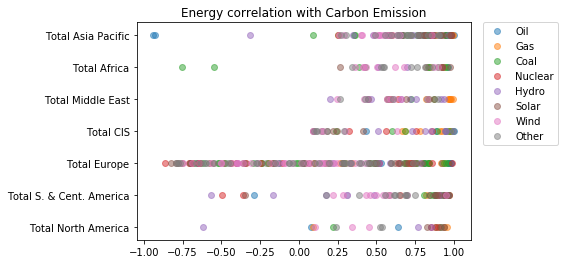

In [27]:
for i in range(1,len(a.columns)):
    plt.scatter(a.iloc[:,i],a.index, alpha=0.5)
    plt.legend(energy,bbox_to_anchor=(1.02,1.025), loc="upper left")
    plt.title('Energy correlation with Carbon Emission')

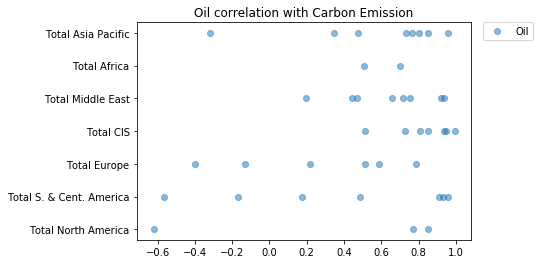

In [28]:
plt.scatter(a[energy[0]],a.index, alpha=0.5)
plt.legend(energy[0:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[0]} correlation with Carbon Emission')
plt.show()

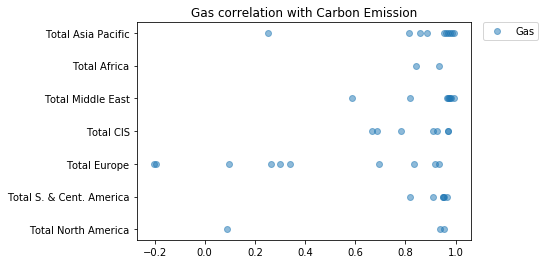

In [29]:
plt.scatter(a[energy[1]],a.index, alpha=0.5)
plt.legend(energy[1:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[1]} correlation with Carbon Emission')
plt.show()

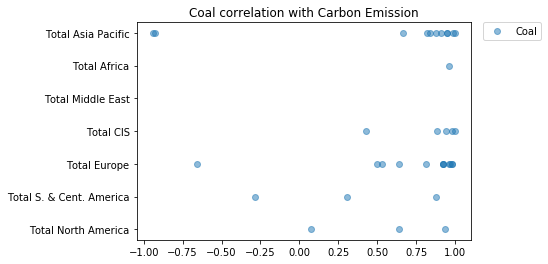

In [37]:
plt.scatter(a[energy[2]],a.index, alpha=0.5)
plt.legend(energy[2:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[2]} correlation with Carbon Emission')
plt.show()

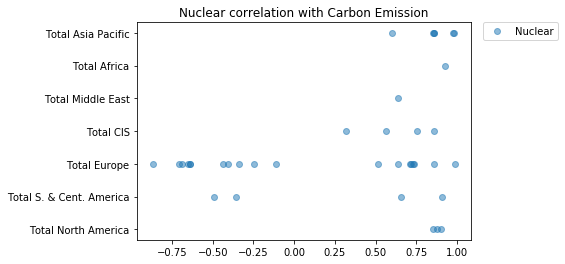

In [38]:
plt.scatter(a[energy[3]],a.index, alpha=0.5)
plt.legend(energy[3:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[3]} correlation with Carbon Emission')
plt.show()

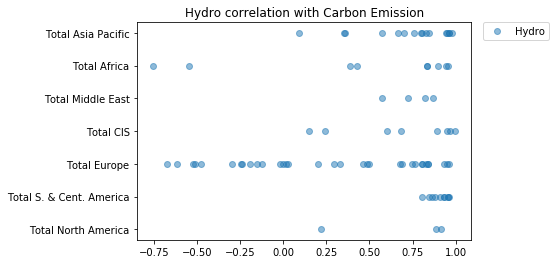

In [39]:
plt.scatter(a[energy[4]],a.index, alpha=0.5)
plt.legend(energy[4:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[4]} correlation with Carbon Emission')
plt.show()

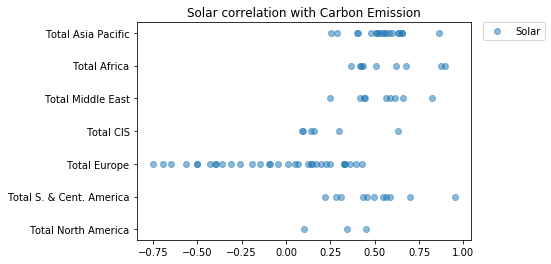

In [40]:
plt.scatter(a[energy[5]],a.index, alpha=0.5)
plt.legend(energy[5:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[5]} correlation with Carbon Emission')
plt.show()

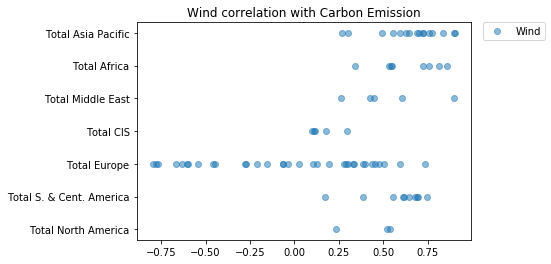

In [41]:
plt.scatter(a[energy[6]],a.index, alpha=0.5)
plt.legend(energy[6:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[6]} correlation with Carbon Emission')
plt.show()

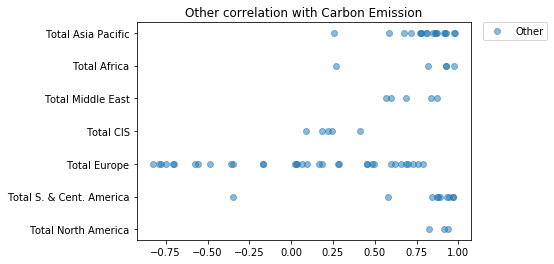

In [43]:
plt.scatter(a[energy[7]],a.index, alpha=0.5)
plt.legend(energy[7:],bbox_to_anchor=(1.02,1.025), loc="upper left")
plt.title(f'{energy[7]} correlation with Carbon Emission')
plt.show()